In [18]:
# Step 1: Data Loading
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv("Medical_Cost_Insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Display the first few rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Display the last few rows of the dataframe
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
print("The dimension of the dataset",df.shape)
print("The column headers of the dataset",df.columns)

The dimension of the dataset (1338, 7)
The column headers of the dataset Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [7]:
print("Lowest charges: ",df.charges.min())
print("Highest charges: ",df.charges.max())

Lowest charges:  1121.8739
Highest charges:  63770.42801


In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
print("Total Duplicate Rows Are: ",df.duplicated().sum())

Total Duplicate Rows Are:  1


In [12]:
duplicate=df[df.duplicated()]
print("Duplicate row is:")
duplicate

Duplicate row is:


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [14]:
df.drop_duplicates(keep=False, inplace=True)

In [15]:
print("Total Duplicate Rows Are: ",df.duplicated().sum())

Total Duplicate Rows Are:  0


<Axes: >

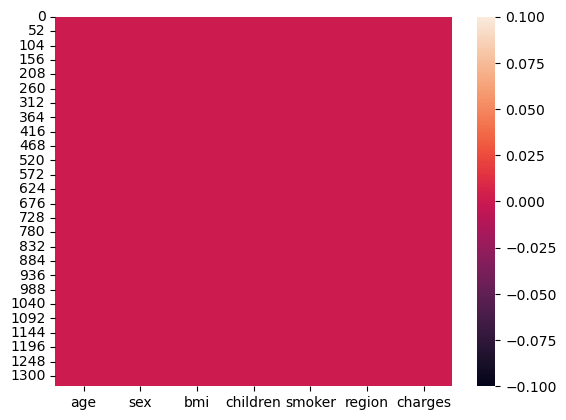

In [19]:
sns.heatmap(df.isnull())

In [20]:
# Step 2: Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encoding categorical variables
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

# Scaling numerical variables
scaler = StandardScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])

# Display the preprocessed dataframe
print(df.head())

        age  sex       bmi  children  smoker  region      charges
0 -1.438764    0 -0.453320 -0.908614       1       3  16884.92400
1 -1.509965    1  0.509621 -0.078767       0       2   1725.55230
2 -0.797954    1  0.383307  1.580926       0       2   4449.46200
3 -0.441948    1 -1.305531 -0.908614       0       1  21984.47061
4 -0.513149    1 -0.292556 -0.908614       0       1   3866.85520


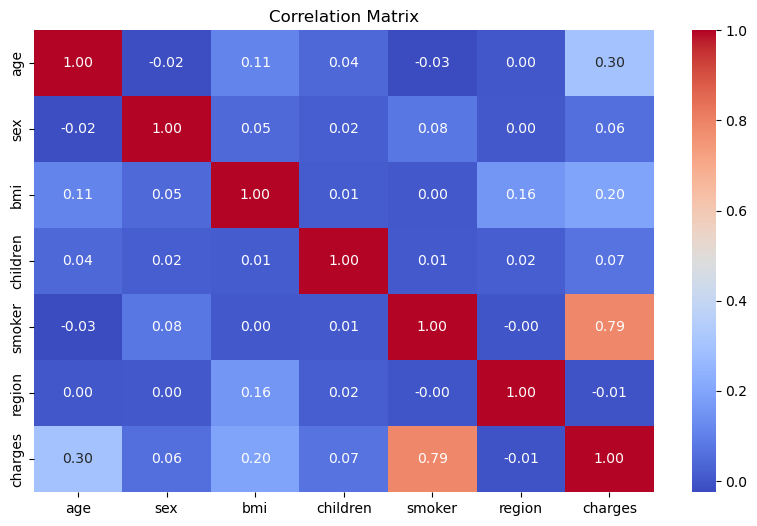

In [21]:
# Step 3: Exploratory Data Analysis (EDA)
# Now we check correlation between features and target variable
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [22]:
# Step 4: Feature Engineering
# Feature engineering can include creating interaction terms, polynomial features, etc.
# For simplicity, let's proceed without additional feature engineering.

In [23]:
# Step 5: Model Selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Splitting the data into train and test sets
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choosing the model
model = RandomForestRegressor()

In [24]:
# Step 6: Model Training with Hyperparameter Tuning
# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [25]:
# Step 7: Model Evaluation
# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Best Parameters:", best_params)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Absolute Error: 2415.8976846886126
Mean Squared Error: 18923205.195655316
Root Mean Squared Error: 4350.081056216691


In [29]:
# Step 8: Prediction (Optional)
# We can now use the trained model to make predictions for new data.
# For example:
new_data = [[35, 1, 24, 1, 0, 2]]
predicted_charges = best_model.predict(new_data)
print("Predicted Insurance Cost:", predicted_charges)

Predicted Insurance Cost: [19619.52839914]
